In [13]:
%load_ext autoreload
%autoreload 2
from board import *
from candy import *
from analysis import *
import matplotlib.pyplot as plt
from viz import Viz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading the data

In [2]:
df = get_df_from_board_files()

# Visualizing

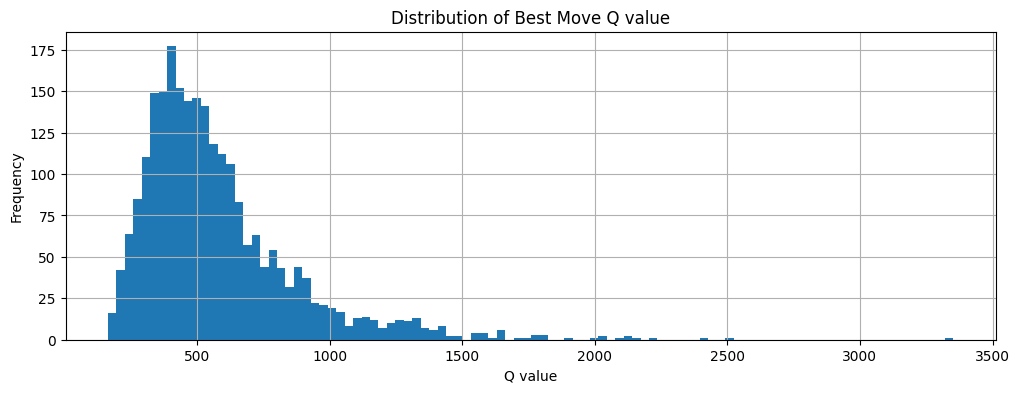

In [3]:
plt.figure(figsize=(12, 4))
df["Move_1_Q"].hist(bins= 100)
plt.title("Distribution of Best Move Q value")
plt.xlabel("Q value")
plt.ylabel("Frequency")
plt.show()


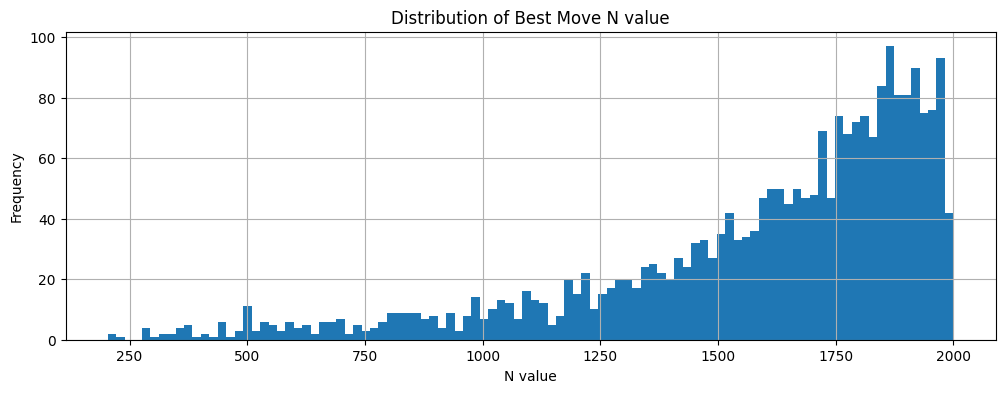

In [69]:
plt.figure(figsize=(12, 4))
df["Move_1_N"].hist(bins= 100)
plt.title("Distribution of Best Move N value")
plt.xlabel("N value")
plt.ylabel("Frequency")
plt.show()


/var/folders/n7/7ln3k6zx5hj40n1dc441clm40000gn/T/ipykernel_21344/40134003.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


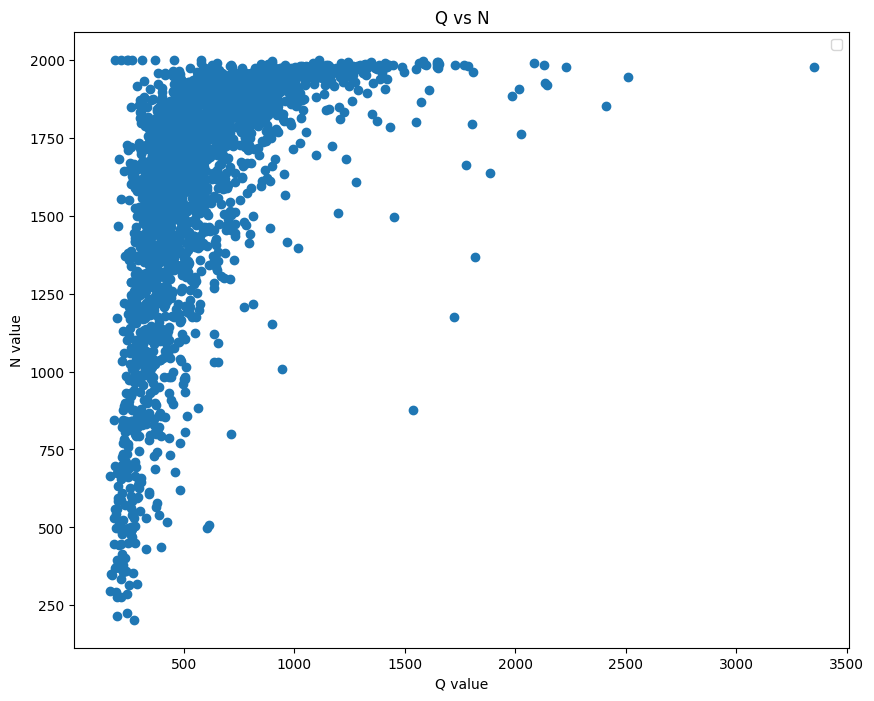

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the means
mean_q = np.mean(df["Move_1_Q"])
mean_n = np.mean(df["Move_1_N"])

plt.figure(figsize=(10,8))
plt.scatter(df["Move_1_Q"], df["Move_1_N"])
plt.title("Q vs N")
plt.xlabel("Q value")
plt.ylabel("N value")
plt.legend()
plt.show()

# How direct reward our mcts seeks ? 

In [35]:
# WARNING: This will take like 1mn to run

real_move_scores = []
count = 0
for state, move in zip(df["state"], df["Move_1"]):
    mean_score = []
    for i in (range(20)):
        score = 0
        board = state_to_board(state,7,7)
        a = Action(board)
        a.swap(*move[0], *move[1])
        board.update()
        mean_score.append(board.score)
    real_move_scores.append(np.mean(mean_score))
    count += 1
    if count % 100 == 0:
        print(count)

109it [00:02, 42.61it/s]

100


209it [00:05, 44.15it/s]

200


309it [00:07, 43.65it/s]

300


399it [00:09, 44.15it/s]

400


508it [00:12, 42.31it/s]

500


608it [00:14, 41.87it/s]

600


708it [00:16, 41.57it/s]

700


807it [00:19, 43.49it/s]

800


906it [00:21, 35.39it/s]

900


1005it [00:24, 35.32it/s]

1000


1108it [00:27, 38.65it/s]

1100


1206it [00:30, 36.66it/s]

1200


1308it [00:33, 38.83it/s]

1300


1405it [00:36, 41.94it/s]

1400


1505it [00:39, 42.84it/s]

1500


1606it [00:42, 41.58it/s]

1600


1706it [00:44, 38.57it/s]

1700


1805it [00:47, 36.71it/s]

1800


1904it [00:50, 34.44it/s]

1900


2009it [00:53, 43.00it/s]

2000


2106it [00:55, 42.75it/s]

2100


2203it [00:58, 34.57it/s]

2200


2302it [01:00, 32.53it/s]

2300


2408it [01:03, 37.63it/s]

2400


Text(0, 0.5, 'Real Move Score')

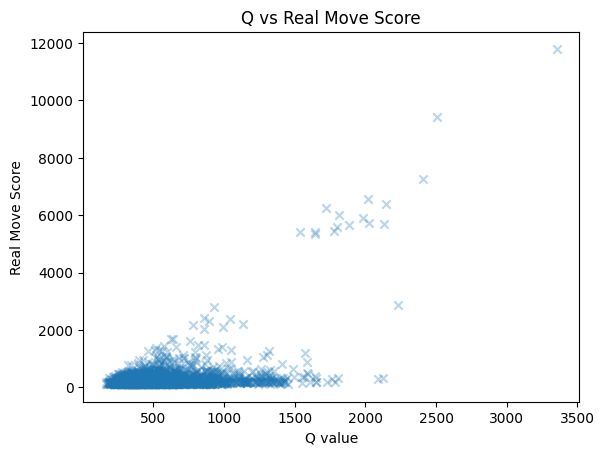

In [72]:
plt.scatter(df["Move_1_Q"], real_move_scores, alpha = 0.3, marker = "x")
plt.title("Q vs Real Move Score")
# log scale
plt.xlabel("Q value")
plt.ylabel("Real Move Score")


# Helper function to display a row of the dataframe on viz

In [15]:
# To visualize the row with id 2 in the dataframe
visualize_row(df, 2)


Move 1: ((4, 2), (4, 3)), N: 1986, Q: 1585.7862497802078
Move 2: ((4, 4), (4, 5)), N: 2.0, Q: 350.0
Move 3: ((3, 4), (3, 5)), N: 2.0, Q: 226.66666666666669
Move 4: ((4, 3), (5, 3)), N: 2.0, Q: 200.0
Move 5: ((1, 3), (1, 4)), N: 2.0, Q: 180.0
Move 6: ((3, 3), (4, 3)), N: 2.0, Q: 180.0
Move 7: ((3, 1), (4, 1)), N: 2.0, Q: 160.0
Move 8: ((2, 3), (2, 4)), N: 2.0, Q: 140.0
Move 9: nan, N: nan, Q: nan
Move 10: nan, N: nan, Q: nan


KeyboardInterrupt: 